In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import math
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.neighbors import NearestCentroid

In [2]:
list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))

#linkage = sch.linkage(X, method  = "ward")

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
hc.fit_predict(X)

clf = NearestCentroid()
clf.fit(X, hc.fit_predict(X))
#hc = linkage(X, method='ward', metric="euclidean")

#fl = fcluster(hc,6,criterion='maxclust')

NearestCentroid()

In [3]:
print(clf.centroids_)

[[ 11.92256239  52.25623874  69.82128842  29.04507548 126.17871158
  196.           1.21246213]
 [ 12.02841561  63.78300804 140.10029943  42.10029943  55.89970057
  196.           1.92959489]
 [ 12.06877866 100.          22.63916587 103.73417365 201.73417365
  196.           0.44148802]
 [ 11.90179334  10.         203.1346096  105.1346096   21.62447332
  196.           2.57280214]
 [ 12.05466238  10.          20.66732519 106.87122874 204.87122874
  196.           0.40947726]
 [ 11.9594514  100.         214.09676237 116.09676237  20.72938784
  196.           2.68466084]]


In [4]:
print(len(hc.distances_))

15965


In [5]:
devicesDf['K-class'] = hc.labels_
devicesDf

Hour                             Device_id  Class_of_service  \
0        0  3b6171db-988d-4395-80f1-9b4880c8ee5d                10   
1        0  6ad0095a-5c40-4850-b603-35791257a5e9               100   
2        0  cbb01ed1-2950-493e-80ff-dd492c3c34e8                10   
3        0  467dd055-5749-461d-9f22-fa027b07d9ba               100   
4        0  32d6a9d1-1dae-4338-93b0-07c114dbf6a7                10   
...    ...                                   ...               ...   
15961   23  d7885bc2-6091-4f99-976d-3ba3ba9ac181               100   
15962   23  fcd874af-a4b4-4cae-a3f1-66d8105bf8a3                10   
15963   23  7cc2b16d-8ec1-4151-89dd-5e2da676aca1               100   
15964   23  939b30de-52c1-435d-b6b4-80b34d57862e                10   
15965   23  a9a52649-bd88-4cdb-a754-446774b62139               100   

       Fog_latency_1  Fog_latency_2  Fog_latency_3  Cloud_latency  \
0         197.059911      99.059911       1.059911            196   
1          38.012869     136.012869     234.012869            196   
2         194.861381      96.861381       1.138619            196   
3         141.717889      43.717889      54.282111            196   
4         150.333943      52.333943      45.666057            196   
...              ...            ...            ...            ...   
15961     152.237091      54.237091      43.762909            196   
15962     220.985557     122.985557      24.985557            196   
15963     118.604026      20.604026      77.395974            196   
15964     227.755986     129.755986      31.755986            196   
15965     147.011190      49.011190      48.988810            196   

       Request_size   Regions  K-class  
0               253  2.510815        3  
1               392  0.112114        2  
2                81  2.488381        3  
3               218  1.946101        1  
4               386  2.034020        1  
...             ...       ...      ...  
15961           289  2.053440        1  
15962           799  2.754955        3  
15963           440  1.710245        1  
15964           532  2.824041        3  
15965           993  2.000114        1  

[15966 rows x 10 columns]

Latencia média =  24.622572776610042


c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

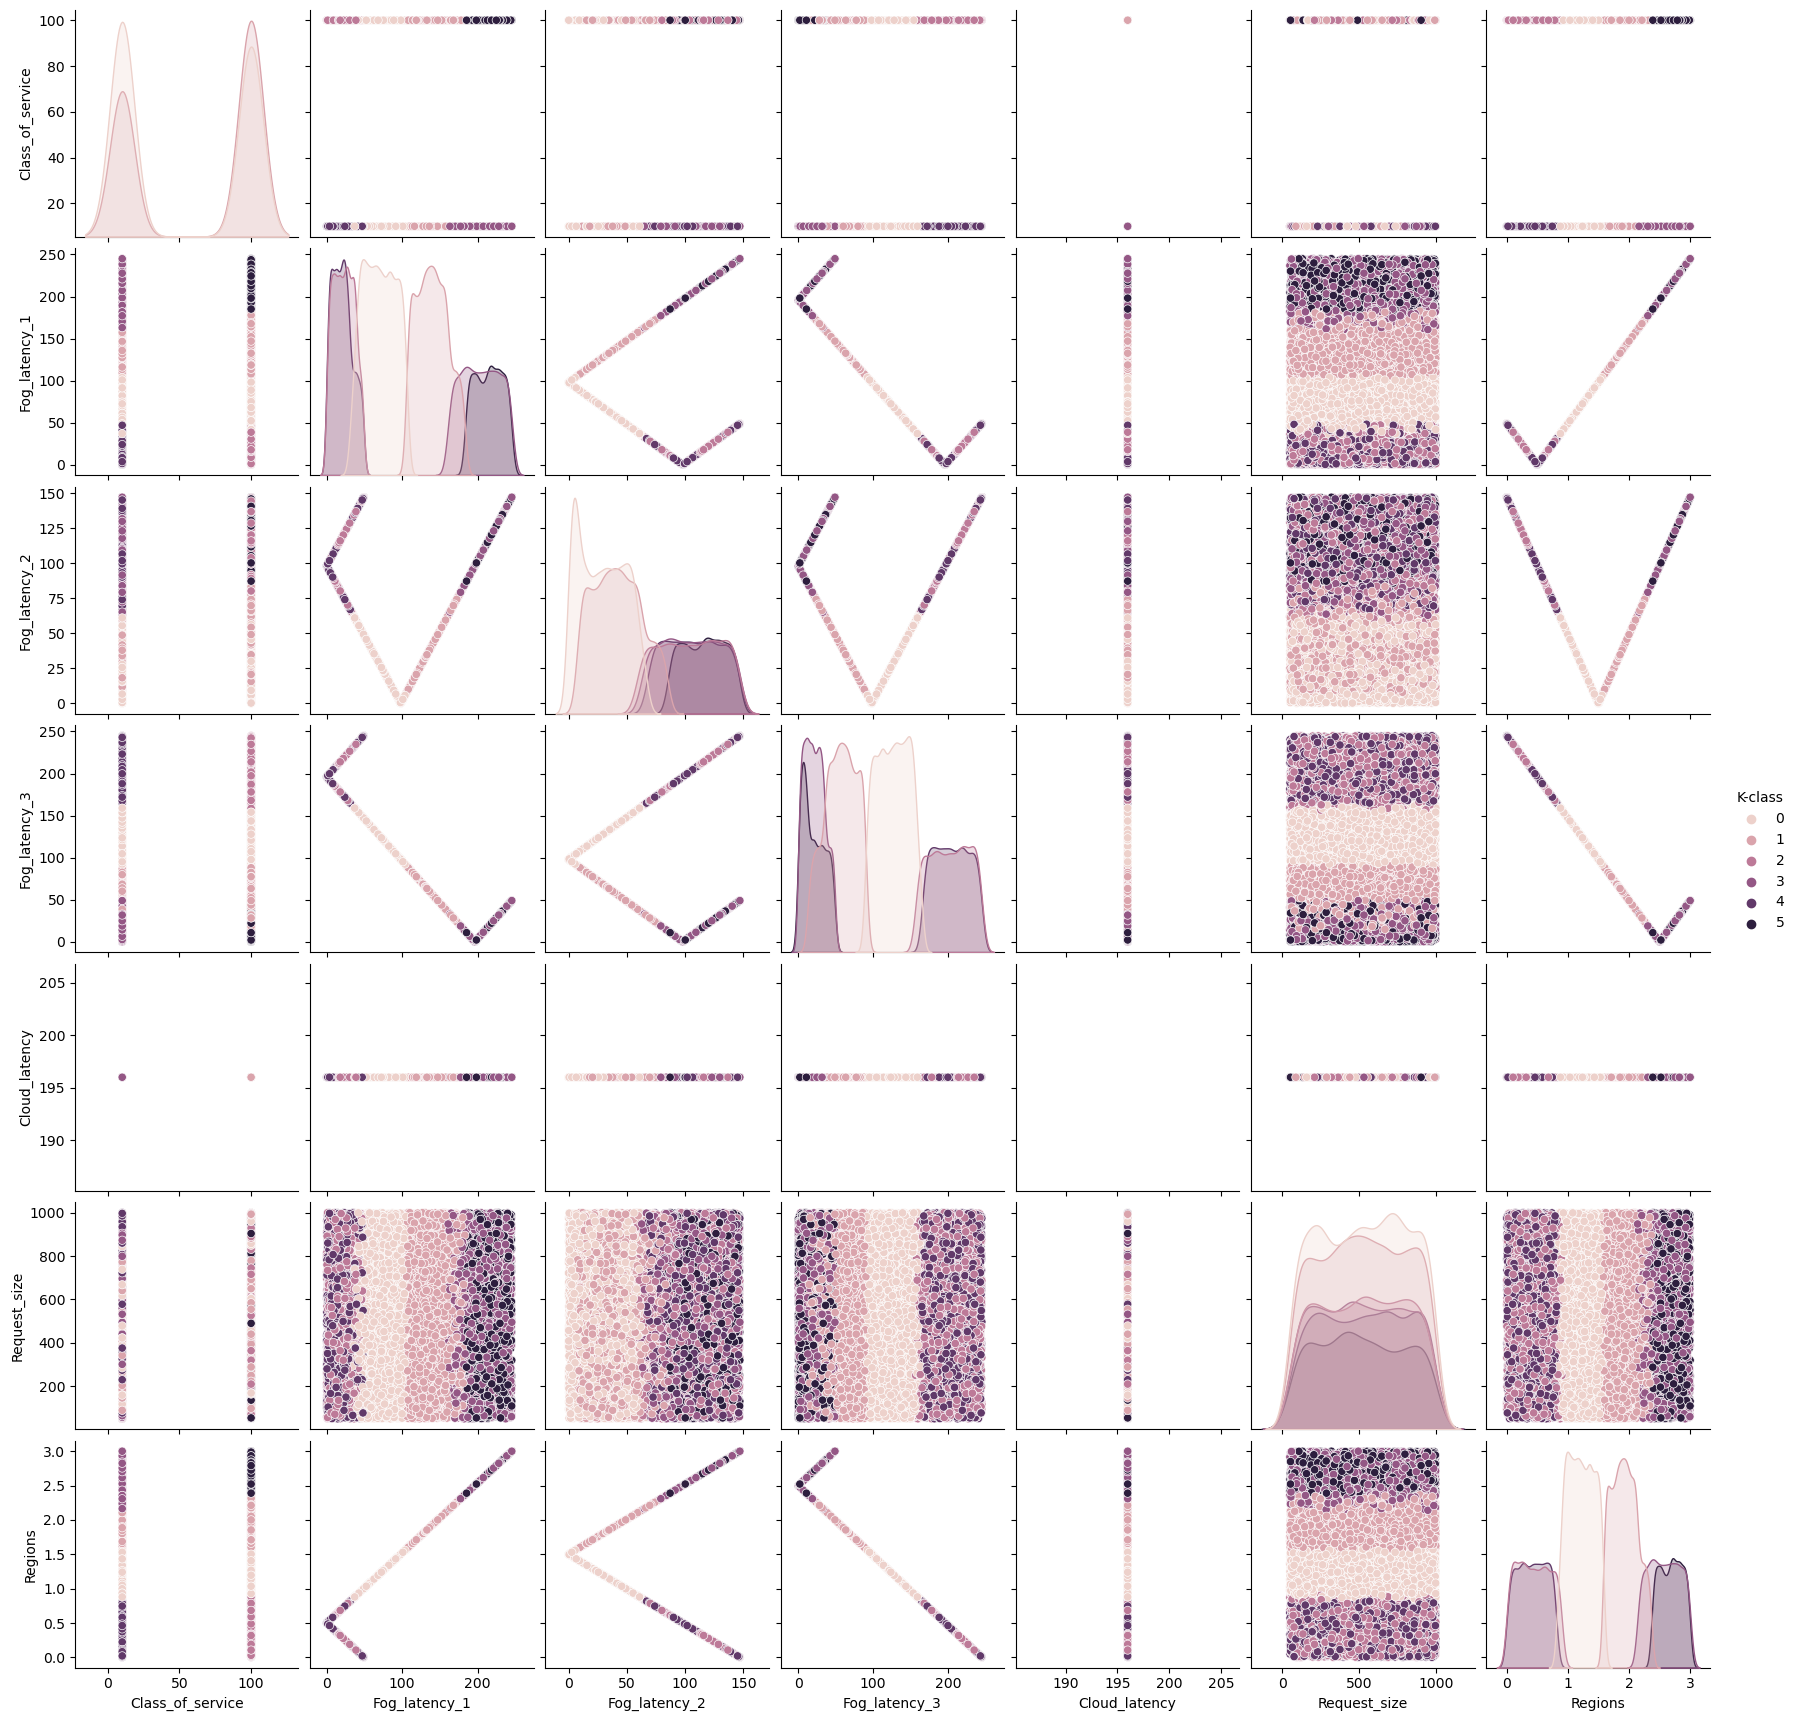

In [6]:
sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
quantidade dispositivos prioritarios =  9
quantidade dispositivos standard =  9
Menor latencia media =  13.149953746195827
latencia média por CoS =  111.14995374619583
Horário =  1
quantidade dispositivos prioritarios =  18
quantidade dispositivos standard =  18
Menor latencia media =  11.640422143976792
latencia média por CoS =  109.64042214397679
Horário =  2
quantidade dispositivos prioritarios =  35
quantidade dispositivos standard =  35
Menor latencia media =  11.508946725060758
latencia média por CoS =  109.50894672506077
Horário =  3
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  64
Menor latencia media =  11.48944190540763
latencia média por CoS =  109.48944190540763
Horário =  4
quantidade dispositivos prioritarios =  108
quantidade dispositivos standard =  108
Menor latencia media =  11.432733934707635
latencia média por CoS =  109.43273393470763

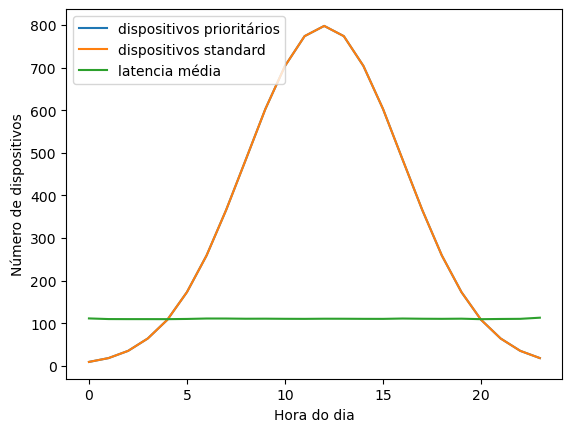

In [7]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 

list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
    hc.fit_predict(X)

    df_by_hour[str(i)]['K-class'] = hc.labels_

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por CoS = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
Devices alocation based on priority of execution.<br>
Priority devices are connected to the fog nodes and standard devices are connected to the cloud processing node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [8]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity

    print("Transmission latency: ", transmission_latency)

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                #fog_node_id = "Fog_latency_" + str(region+1)
                #latency_by_priority += devices_regions[region][index][fog_node_id]
                #num_priority += 1
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                #if devices_regions[region][index]["Class_of_service"] == 100:
                #    latency_by_priority += devices_regions[region][index]["standard_latency"]
                #else:
                #    standard_latency += devices_regions[region][index]["standard_latency"]
                #num_standard += 1

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"] + transmission_latency
                else:
                    latency_by_priority += devices[fog_node_id] + transmission_latency
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"] + transmission_latency
                else:
                    standard_latency += devices[fog_node_id] + transmission_latency
    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: fog_first_alocation<br>
Fog first alocation aims to use all capacity of the fog nodes before starts to use the cloud processing node.<br>
Devices that are standard and are connected to the fog node can be relocated to the cloud if a priority user needs to processed in the fog node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [9]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                # search for no_priority device connected to fog node
                non_priority_in_fog = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_in_fog = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)

                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])
                        break
                # if no no-priority device is found, just connect to the cloud
                if non_priority_in_fog == False:
                    processing_nodes[-1].connected_devices.append(
                        devices_regions[region][index])

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"] + transmission_latency
                else:
                    latency_by_priority += devices[fog_node_id] + transmission_latency
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"] + transmission_latency
                else:
                    standard_latency += devices[fog_node_id] + transmission_latency

    print("numero prioritarios: ", num_priority)
    print("numero standard: ", num_standard)
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_cloud_only<br>
Cloud only aims to use only the processing capacity of the cloud node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [10]:
def alocation_cloud_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[-1].connected_devices) < processing_nodes[-1].device_capacity:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                #latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                #num_priority += 1
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[-1].connected_devices)):
                    if processing_nodes[-1].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[-1].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[-1].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node  
                        processing_nodes[-1].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[-1].connected_devices.append(devices_regions[region][index])

                        break
                
                # if no no-priority device is found, just connect to the cloud
                if non_priority_processing == False:
                    processing_nodes[-1].queue_devices.append(
                        devices_regions[region][index])
                    #cloud_latency += devices_regions[region][index]["Cloud_latency"] + (len(processing_nodes[-1].queue_devices) * 100)
                    #num_standard += 1

    count_devices = 0
    for devices in processing_nodes[-1].connected_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            latency_by_priority += devices["Cloud_latency"] + transmission_latency
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            standard_latency += devices["Cloud_latency"] + transmission_latency

    for devices in processing_nodes[-1].queue_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            count_devices += 1
            latency_by_priority += devices["Cloud_latency"] + (count_devices * 100) + transmission_latency
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            count_devices += 1
            standard_latency += devices["Cloud_latency"] + (count_devices * 100) + transmission_latency

    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_fog_only<br>
Fog only aims to use only the processing capacity of the fog node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [11]:
def alocation_fog_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                #fog_node_id = "Fog_latency_" + str(region+1)
                #latency_by_priority += devices_regions[region][index][fog_node_id]
                #num_priority += 1
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[region].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                
                if non_priority_processing == False:
                    # if no no-priority device in found, just connect to the cloud
                    processing_nodes[region].queue_devices.append(
                        devices_regions[region][index])
                    #fog_node_id = "Fog_latency_" + str(region+1)
                    #cloud_latency += devices_regions[region][index][fog_node_id] + (len(processing_nodes[region].queue_devices) * 100)

                #num_standard += 1
    for region in range(len(processing_nodes) - 1):
        count_devices = 0
        fog_node_id = "Fog_latency_" + str(region+1)
        for devices in processing_nodes[region].connected_devices:
            if devices["Class_of_service"] == 100:
                num_priority += 1
                latency_by_priority += devices[fog_node_id] + transmission_latency
            else:
                standard_latency += devices[fog_node_id] + transmission_latency
                num_standard += 1
        for devices in processing_nodes[region].queue_devices:
            print(devices)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                count_devices += 1
                latency_by_priority += devices[fog_node_id] + (count_devices * 100) + transmission_latency
                print("queue devices: ", count_devices)
                print("latency queued: ", latency_by_priority)
            else:
                num_standard += 1
                count_devices += 1
                standard_latency += devices[fog_node_id] + (count_devices * 100) + transmission_latency

    print("############ FOGS ############")
    print("fog 0 connected: ", len(processing_nodes[0].connected_devices))
    print("fog 0 queue: ", len(processing_nodes[0].queue_devices))
    print("fog 1 connected: ", len(processing_nodes[1].connected_devices))
    print("fog 1 queue: ", len(processing_nodes[1].queue_devices))
    print("fog 2 connected: ", len(processing_nodes[2].connected_devices))
    print("fog 2 queue: ", len(processing_nodes[2].queue_devices))

    return latency_by_priority, standard_latency, num_priority, num_standard

### Clustering and getting ready for alocation processes

In [12]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some unused columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
    y_hc = hc.fit_predict(X)
    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = y_hc

    clf = NearestCentroid()
    clf.fit(X, y_hc)

    centers = clf.centroids_
    
    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
[(0.48096090620573634, 2), (0.5108974300073803, 1), (1.4824663533605236, 4), (2.033938715896191, 3), (2.288799252252804, 0), (2.6458405975669876, 5)]
Horário =  1
[(0.4401524225612936, 4), (0.47285691365522536, 5), (1.3765228054939531, 2), (1.7691537359383345, 3), (2.2760490157661564, 1), (2.5549576350088543, 0)]
Horário =  2
[(0.35960603963198967, 4), (0.3930772428890755, 2), (1.3051142212398612, 3), (1.35598021295867, 5), (2.462913822042489, 1), (2.4721572659927364, 0)]
Horário =  3
[(0.4911483212035209, 2), (0.5104480080243474, 5), (1.2351528021617266, 3), (1.5949673769390136, 0), (2.2287792266252158, 1), (2.708496673314305, 4)]
Horário =  4
[(0.44143883133214196, 4), (0.6655177946333011, 3), (1.358941983246697, 0), (1.9934710608536856, 5), (2.372451032378081, 1), (2.669925232154213, 2)]
Horário =  5
[(0.4889631536553941, 0), (1.105287056824522, 5), (1.3481542197661025, 4), (1.7496696

### Alocation by priority

Hour:  0
Transmission latency:  0.1966
Latency by priority:  262.33676552848124  num_priority:  9
Latencia media:  29.148529503164582
Latency cloud:  1765.7694  num_standard:  9
Latencia standard media:  196.1966
Hour:  1
Transmission latency:  0.1966
Latency by priority:  422.59399718316456  num_priority:  18
Latencia media:  23.47744428795359
Latency cloud:  3531.538800000001  num_standard:  18
Latencia standard media:  196.19660000000007
Hour:  2
Transmission latency:  0.1966
Latency by priority:  812.5072707542533  num_priority:  35
Latencia media:  23.214493450121523
Latency cloud:  6866.881000000005  num_standard:  35
Latencia standard media:  196.19660000000013
Hour:  3
Transmission latency:  0.1966
Latency by priority:  1537.52805693436  num_priority:  64
Latencia media:  24.023875889599374
Latency cloud:  12556.58239999999  num_standard:  64
Latencia standard media:  196.19659999999985
Hour:  4
Transmission latency:  0.1966
Latency by priority:  2755.2978841072754  num_priorit

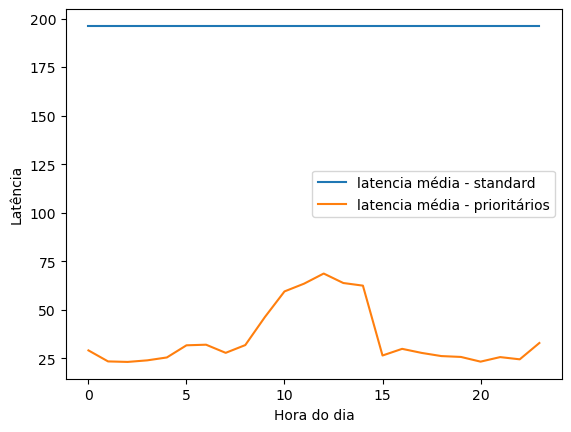

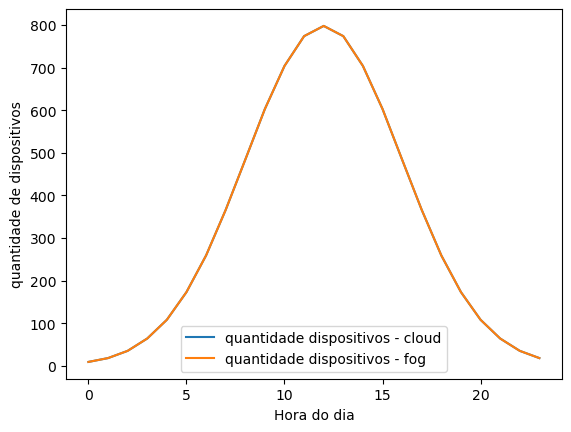

In [13]:
latency_list_fog_by_priority = []
latency_list_cloud_by_priority = []
all_devices_latency_mean_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #######################################################
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ######################################################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_by_priority(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_by_priority(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    latency_list_fog_by_priority.append(media_priority_latency)
    latency_list_cloud_by_priority.append(media_cloud_latency)
    all_devices_latency_mean_by_priority.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - cloud', 'quantidade dispositivos - fog'])
pl.show()

### Alocation - Fog First

Hour:  0
numero prioritarios:  9
numero standard:  9
Latencia media prioritarios:  29.148529503164582
Latencia media standard:  20.442090871144025
Hour:  1
numero prioritarios:  18
numero standard:  18
Latencia media prioritarios:  23.47744428795359
Latencia media standard:  23.768587364445413
Hour:  2
numero prioritarios:  35
numero standard:  35
Latencia media prioritarios:  23.214493450121523
Latencia media standard:  25.132880459357146
Hour:  3
numero prioritarios:  64
numero standard:  64
Latencia media prioritarios:  24.023875889599374
Latencia media standard:  29.775920778593605
Hour:  4
numero prioritarios:  108
numero standard:  108
Latencia media prioritarios:  25.512017445437735
Latencia media standard:  29.737175757704488
Hour:  5
numero prioritarios:  173
numero standard:  173
Latencia media prioritarios:  31.77012619987009
Latencia media standard:  25.71593160801803
Hour:  6
numero prioritarios:  259
numero standard:  259
Latencia media prioritarios:  32.07826907993886
La

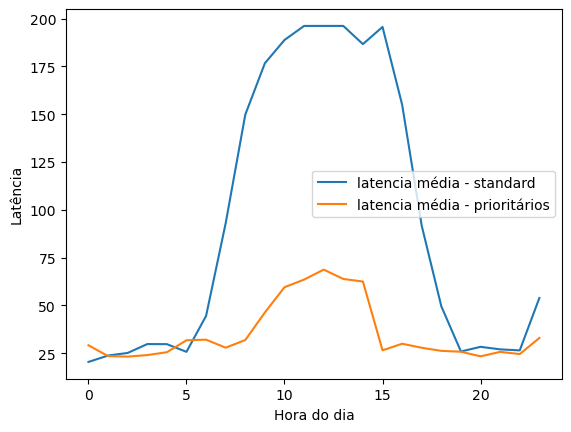

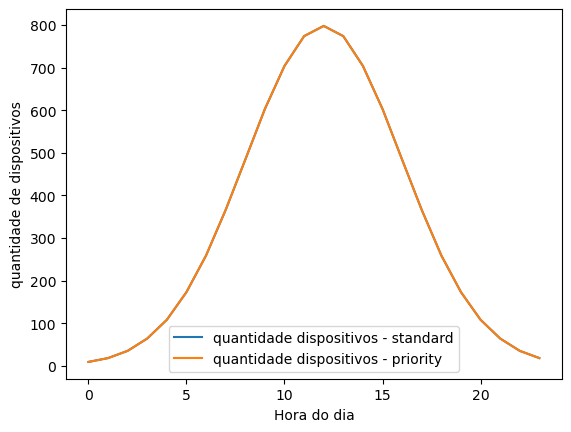

In [14]:
latency_list_fog_fog_first = []
latency_list_cloud_fog_first = []
all_devices_latency_mean_fog_first = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #########################
    # ALOCATION - FOG FIRST #
    #########################
    latency_by_priority, cloud_latency, num_priority, num_standard = fog_first_alocation(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='fog_first_alocation(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard  
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latencia media prioritarios: ", media_priority_latency)
    print("Latencia media standard: ", media_cloud_latency)
    latency_list_fog_fog_first.append(media_priority_latency)
    latency_list_cloud_fog_first.append(media_cloud_latency)
    all_devices_latency_mean_fog_first.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - standard', 'quantidade dispositivos - priority'])
pl.show()

### Alocation - Only Cloud

Hour:  0
Latency by priority:  1765.7694  num_priority:  9
Latencia media:  196.1966
Latency cloud:  1765.7694  num_standard:  9
Latencia standard media:  196.1966
Latencia media:  196.1966
Hour:  1
Latency by priority:  3531.538800000001  num_priority:  18
Latencia media:  196.19660000000007
Latency cloud:  3531.538800000001  num_standard:  18
Latencia standard media:  196.19660000000007
Latencia media:  196.19660000000007
Hour:  2
Latency by priority:  6866.881000000005  num_priority:  35
Latencia media:  196.19660000000013
Latency cloud:  6866.881000000005  num_standard:  35
Latencia standard media:  196.19660000000013
Latencia media:  196.19660000000013
Hour:  3
Latency by priority:  12556.58239999999  num_priority:  64
Latencia media:  196.19659999999985
Latency cloud:  12556.58239999999  num_standard:  64
Latencia standard media:  196.19659999999985
Latencia media:  196.19659999999985
Hour:  4
Latency by priority:  21189.23279999996  num_priority:  108
Latencia media:  196.196599

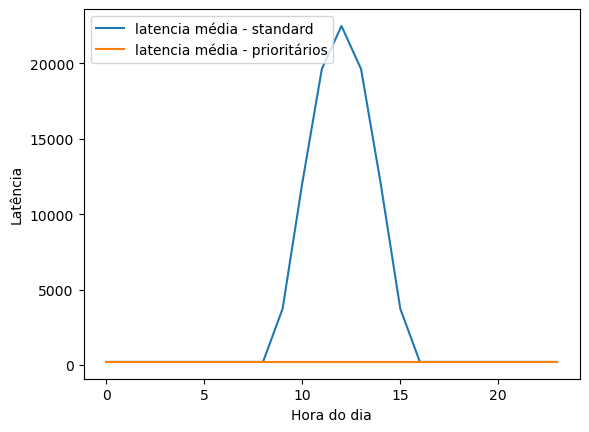

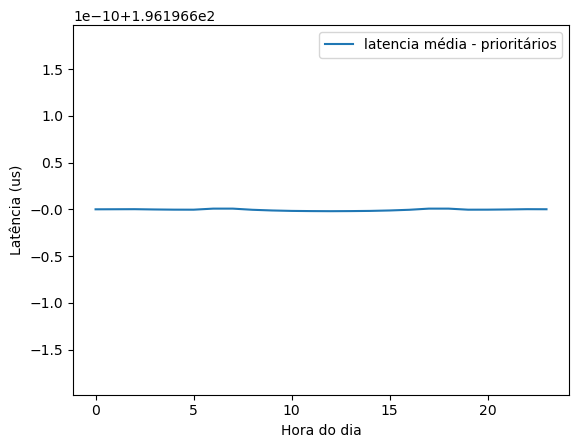

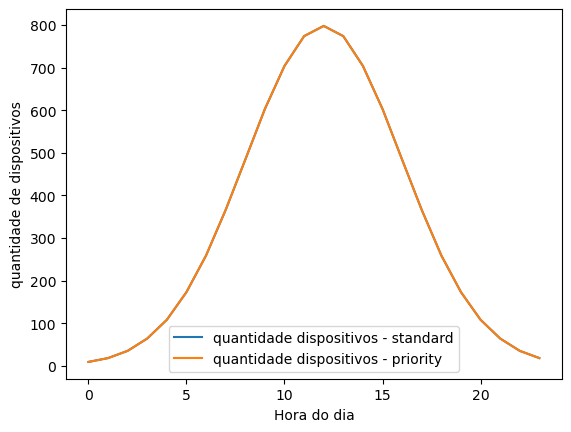

In [15]:
latency_list_fog_only_cloud = []
latency_list_cloud_only_cloud = []
all_devices_latency_mean_only_cloud = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    cloud_latency = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ##########################
    # ALOCATION - ONLY CLOUD #
    ##########################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)


    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_cloud.append(media_priority_latency)
    latency_list_cloud_only_cloud.append(media_cloud_latency)
    all_devices_latency_mean_only_cloud.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - cloud")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - standard', 'quantidade dispositivos - priority'])
pl.show()

### Alocation - Only Fog

Hour:  0
############ FOGS ############
fog 0 connected:  4
fog 0 queue:  0
fog 1 connected:  3
fog 1 queue:  0
fog 2 connected:  11
fog 2 queue:  0
Latency by priority:  262.33676552848124  num_priority:  9
Latencia media:  29.148529503164582
Latency cloud:  183.97881784029622  num_standard:  9
Latencia standard media:  20.442090871144025
Latencia media:  29.148529503164582
Hour:  1
############ FOGS ############
fog 0 connected:  11
fog 0 queue:  0
fog 1 connected:  13
fog 1 queue:  0
fog 2 connected:  12
fog 2 queue:  0
Latency by priority:  422.59399718316456  num_priority:  18
Latencia media:  23.47744428795359
Latency cloud:  427.8345725600174  num_standard:  18
Latencia standard media:  23.768587364445413
Latencia media:  23.47744428795359
Hour:  2
############ FOGS ############
fog 0 connected:  26
fog 0 queue:  0
fog 1 connected:  14
fog 1 queue:  0
fog 2 connected:  30
fog 2 queue:  0
Latency by priority:  812.5072707542533  num_priority:  35
Latencia media:  23.2144934501215

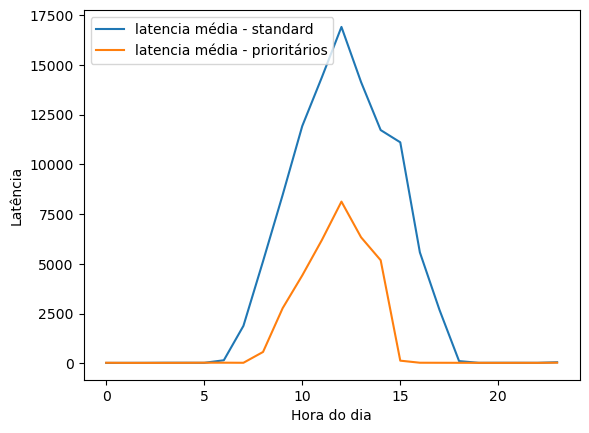

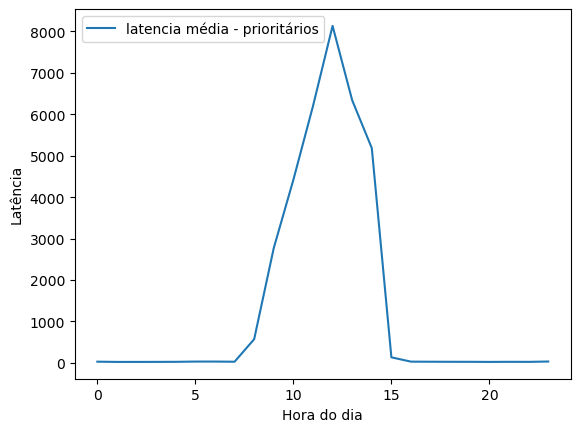

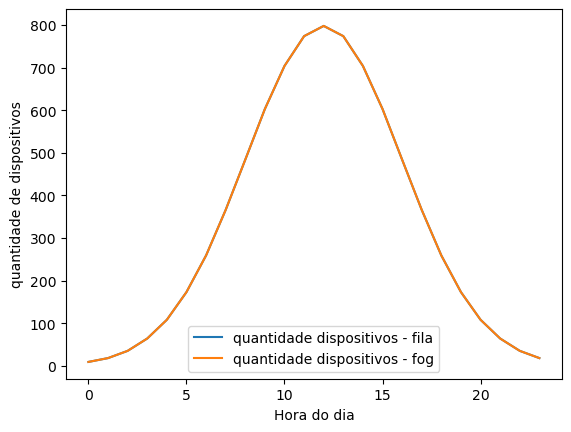

In [16]:
latency_list_fog_only_fog = []
latency_list_cloud_only_fog = []
all_devices_latency_mean_only_fog = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ########################
    # ALOCATION - ONLY FOG #
    ########################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_fog_only(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_fog_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)

    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_fog.append(media_priority_latency)
    latency_list_cloud_only_fog.append(media_cloud_latency)
    all_devices_latency_mean_only_fog.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - fila', 'quantidade dispositivos - fog'])
pl.show()

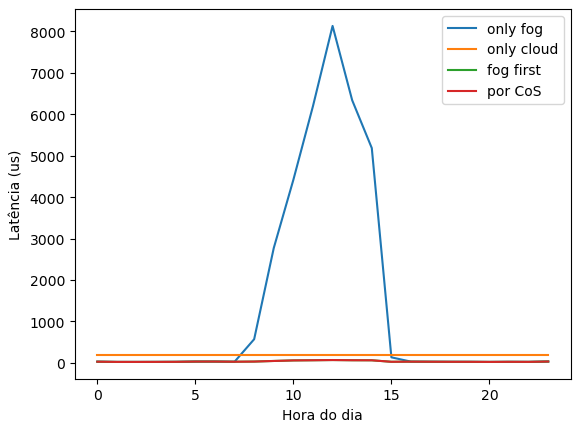

In [17]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

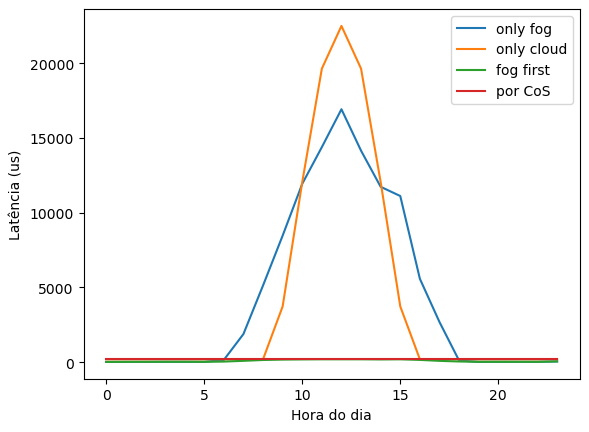

In [18]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

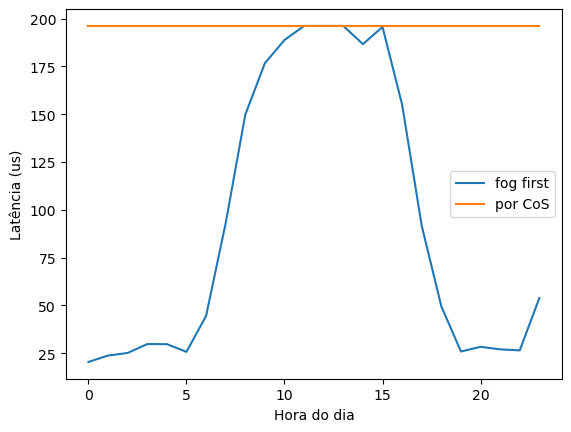

In [19]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por CoS'])
pl.show()

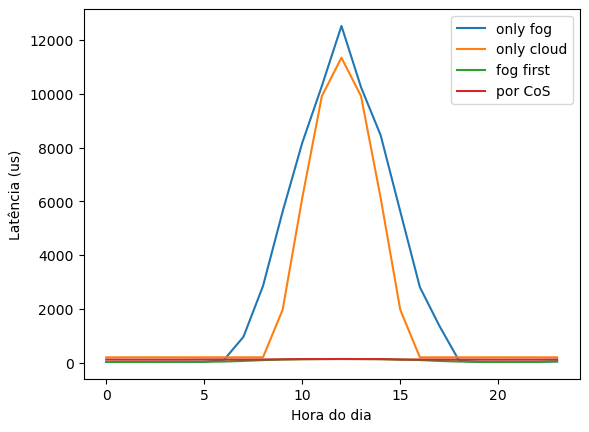

In [20]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

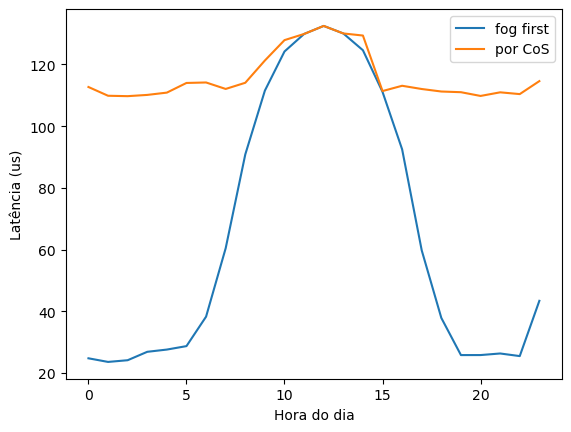

In [21]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por CoS'])
pl.show()

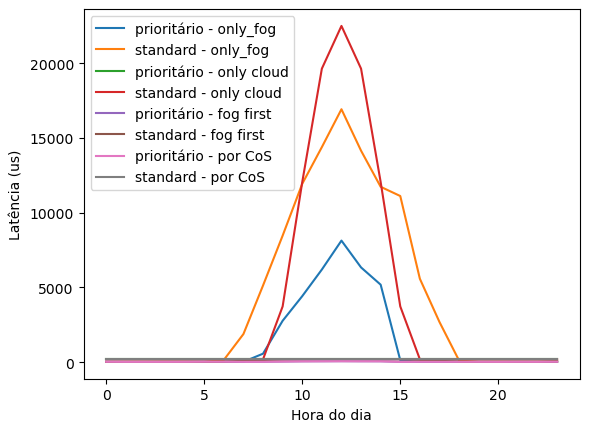

In [22]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por CoS")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['prioritário - only_fog',
            'standard - only_fog',
            'prioritário - only cloud',
            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por CoS',
            'standard - por CoS'])
pl.show()

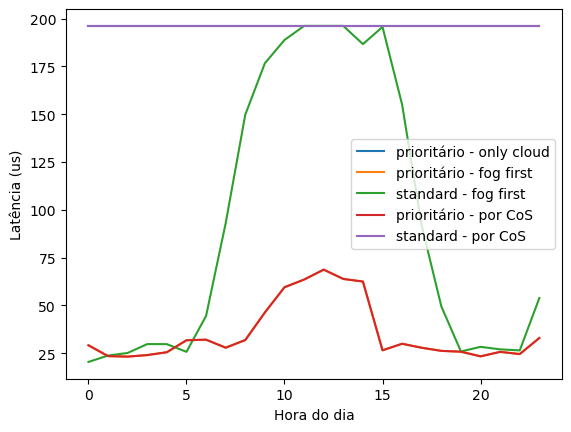

In [23]:
#pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por CoS")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend([#'prioritário - only_fog',
#            'standard - only_fog',
            'prioritário - only cloud',
#            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por CoS',
            'standard - por CoS'])
pl.show()